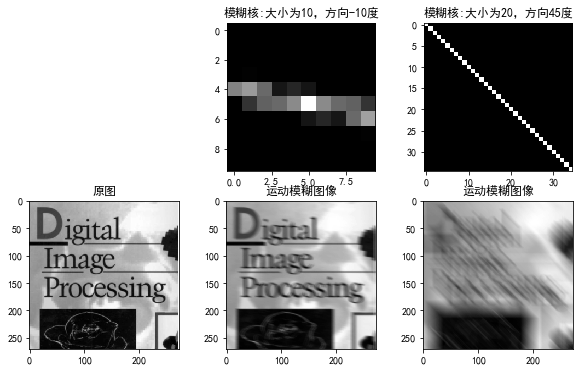

In [2]:
# coding: utf-8
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

#生成运动模糊核
def make_PSF(kernel_size=15, angle=60):
    PSF = np.diag(np.ones(kernel_size))  # 初始模糊核的方向是-45度
    angle = angle + 45  # 抵消-45度的影响
    #图像旋转是一种几何变换，实现图像几何变换有两步：先生成变换算子，再执行变换
    M = cv2.getRotationMatrix2D((kernel_size / 2, kernel_size / 2), angle, 1)  # 生成旋转算子
    PSF = cv2.warpAffine(PSF, M, (kernel_size, kernel_size),flags=cv2.INTER_LINEAR)
    PSF = PSF / PSF.sum()    #模糊核的权重和为1
    return PSF

def motion_blur(image,PSF):
    blurred = cv2.filter2D(image, -1, PSF)        #通过二维卷积运算给图像添加模糊
    # convert to uint8
    cv2.normalize(blurred, blurred, 0, 255, cv2.NORM_MINMAX)
    blurred = np.array(blurred, dtype=np.uint8)
    return blurred


if __name__=="__main__":
    img = cv2.imread(r'../img/adip.png',0)
    PSF1=make_PSF(10,-10) #调用make_PSF函数生成核大小为10，方向为-10度的运动模糊核 
    imgBlur1 = cv2.filter2D(img, -1, PSF1) #产生运动模糊图像
    PSF2=make_PSF(35,-45) #调用make_PSF函数生成核大小为20，方向为45度的运动模糊核 
    imgBlur2 = cv2.filter2D(img, -1, PSF2) #产生运动模糊图像    
    plt.figure(figsize=(10,6))
    plt.subplot(234)
    plt.imshow(img,cmap =plt.cm.gray)
    plt.title("原图")
    plt.subplot(232)
    plt.imshow(PSF1,cmap =plt.cm.gray)
    plt.title("模糊核:大小为10，方向-10度")
    plt.subplot(233)
    plt.imshow(PSF2,cmap =plt.cm.gray)
    plt.title("模糊核:大小为20，方向45度")
    plt.subplot(235)
    plt.imshow(imgBlur1,cmap =plt.cm.gray)
    plt.title("运动模糊图像")
    plt.subplot(236)
    plt.imshow(imgBlur2,cmap =plt.cm.gray)
    plt.title("运动模糊图像")
    plt.show()
